In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head(5)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
data.tail(5)

,x1,x2,y
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


In [5]:
data.shape

(2227, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [7]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [8]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

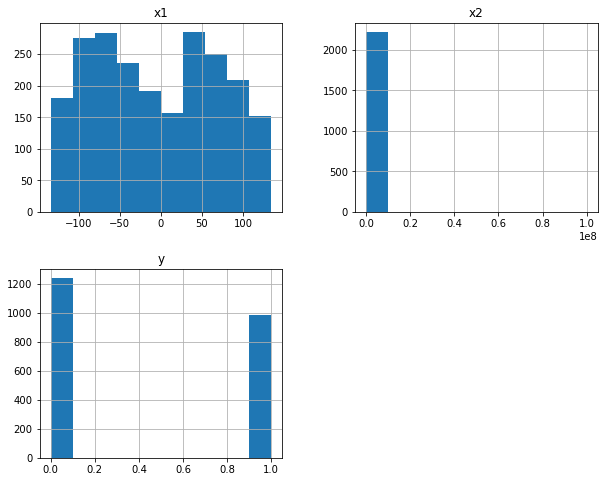

In [9]:
data.hist(figsize=(10,8))

In [10]:
data.x1=data.x1.fillna(data.x1.mean())

In [11]:
data.x2=data.x1.fillna(data.x2.mean())

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

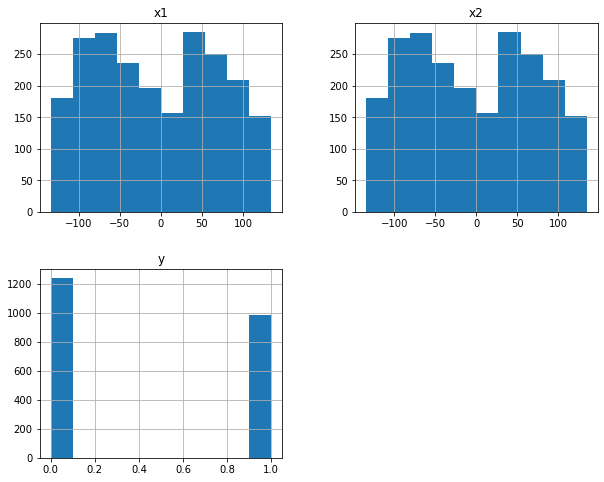

In [12]:
data.hist(figsize=(10,8))

In [13]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [14]:
data.head(3)

,x1,x2,y
0,-119.366669,-119.366669,1
1,-101.108044,-101.108044,1
2,-130.278658,-130.278658,1


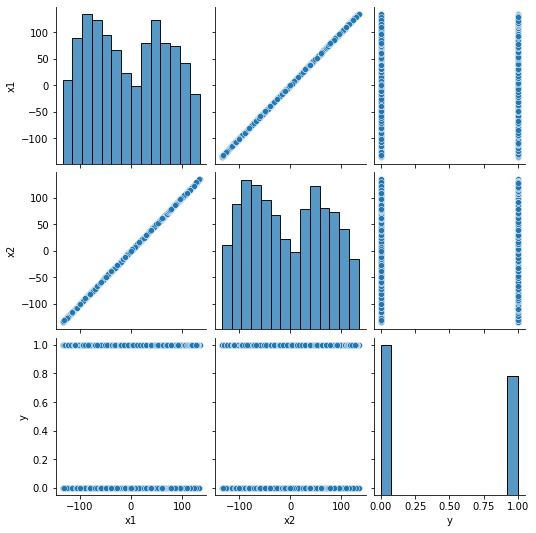

In [15]:
sns.pairplot(data)

In [16]:
data.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

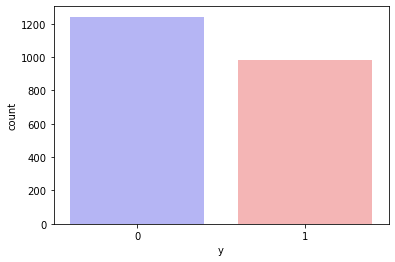

In [17]:
sns.countplot(x="y", data=data, palette="bwr")

In [18]:
x=data.drop(['y'],axis=1)

In [19]:
y=data['y']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

# Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

In [38]:
metrics.accuracy_score(y_test,lr_pred)

0.5964125560538116

In [43]:
print(metrics.classification_report(y_test,lr_pred),'\n')

              precision    recall  f1-score   support

           0       0.59      0.83      0.69       242
           1       0.62      0.31      0.42       204

    accuracy                           0.60       446
   macro avg       0.60      0.57      0.55       446
weighted avg       0.60      0.60      0.57       446
 



roc_auc_score for Logistic Regression:  0.5679083616917842


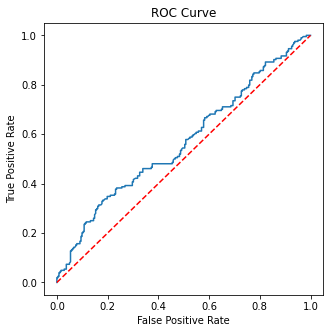

In [44]:
y_score = lr_model.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# svc with linear kernel

In [45]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(x_train_std,y_train)
svc_pred=svc_model_linear.predict(x_test_std)

In [46]:
metrics.accuracy_score(y_test,svc_pred)

0.5426008968609866

In [47]:
print(metrics.classification_report(y_test,svc_pred),'\n')

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       242
           1       0.00      0.00      0.00       204

    accuracy                           0.54       446
   macro avg       0.27      0.50      0.35       446
weighted avg       0.29      0.54      0.38       446
 



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


roc_auc_score for SVC:  0.5683843785448064


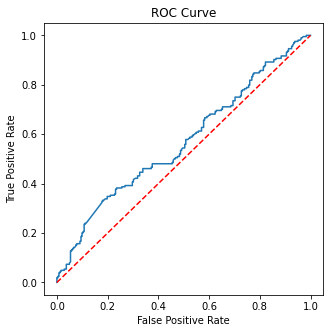

In [48]:
y_score = svc_model_linear.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for SVC: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVC with RBF kernel

In [49]:
from sklearn.svm import SVC
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True,C=1) 
svc_model_rbf.fit(x_train_std,y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test_std)

In [50]:
metrics.accuracy_score(y_test,svc_pred_rbf)

0.5829596412556054

In [51]:
print(metrics.classification_report(y_test,svc_pred_rbf),'\n')

              precision    recall  f1-score   support

           0       0.59      0.77      0.67       242
           1       0.57      0.36      0.44       204

    accuracy                           0.58       446
   macro avg       0.58      0.57      0.55       446
weighted avg       0.58      0.58      0.56       446
 



roc_auc_score for SVC with rbf:  0.5584082806676389


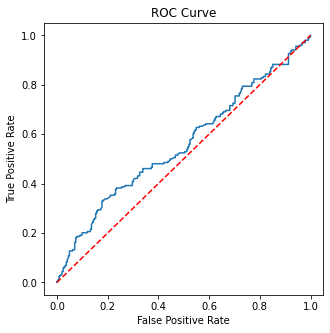

In [52]:
y_score = svc_model_rbf.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for SVC with rbf: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=47) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

In [54]:
metrics.accuracy_score(y_test,knn_pred)

0.5739910313901345

In [55]:
print(metrics.classification_report(y_test,knn_pred),'\n')

              precision    recall  f1-score   support

           0       0.59      0.71      0.65       242
           1       0.55      0.41      0.47       204

    accuracy                           0.57       446
   macro avg       0.57      0.56      0.56       446
weighted avg       0.57      0.57      0.56       446
 



roc_auc_score for KNN:  0.5626114081996436


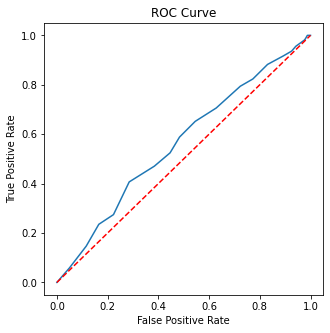

In [56]:
y_score = knn_model.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

So we can see KNN is best among all, as it has better auc score and also i am considering it to be best because balance of classes between Precision and Recall is far better than other Models. 